In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import zscore
import statsmodels.api as sm
from datetime import timedelta, datetime

In [26]:
df = pd.read_csv("elektrisitet-forbruk-gruppe.csv", delimiter=";", na_values="..", encoding="latin1")
df = df.pivot_table(index="år", values="Forbruk i alt", columns="forbrukergruppe", aggfunc="first")
df.dropna(inplace=True)

In [49]:
df_percent = df.div(df.sum(axis=1), axis=0) * 100
df_percent = df_percent[sorted(df_percent.columns, key=lambda col: df_percent[col].sum(), reverse=True)]

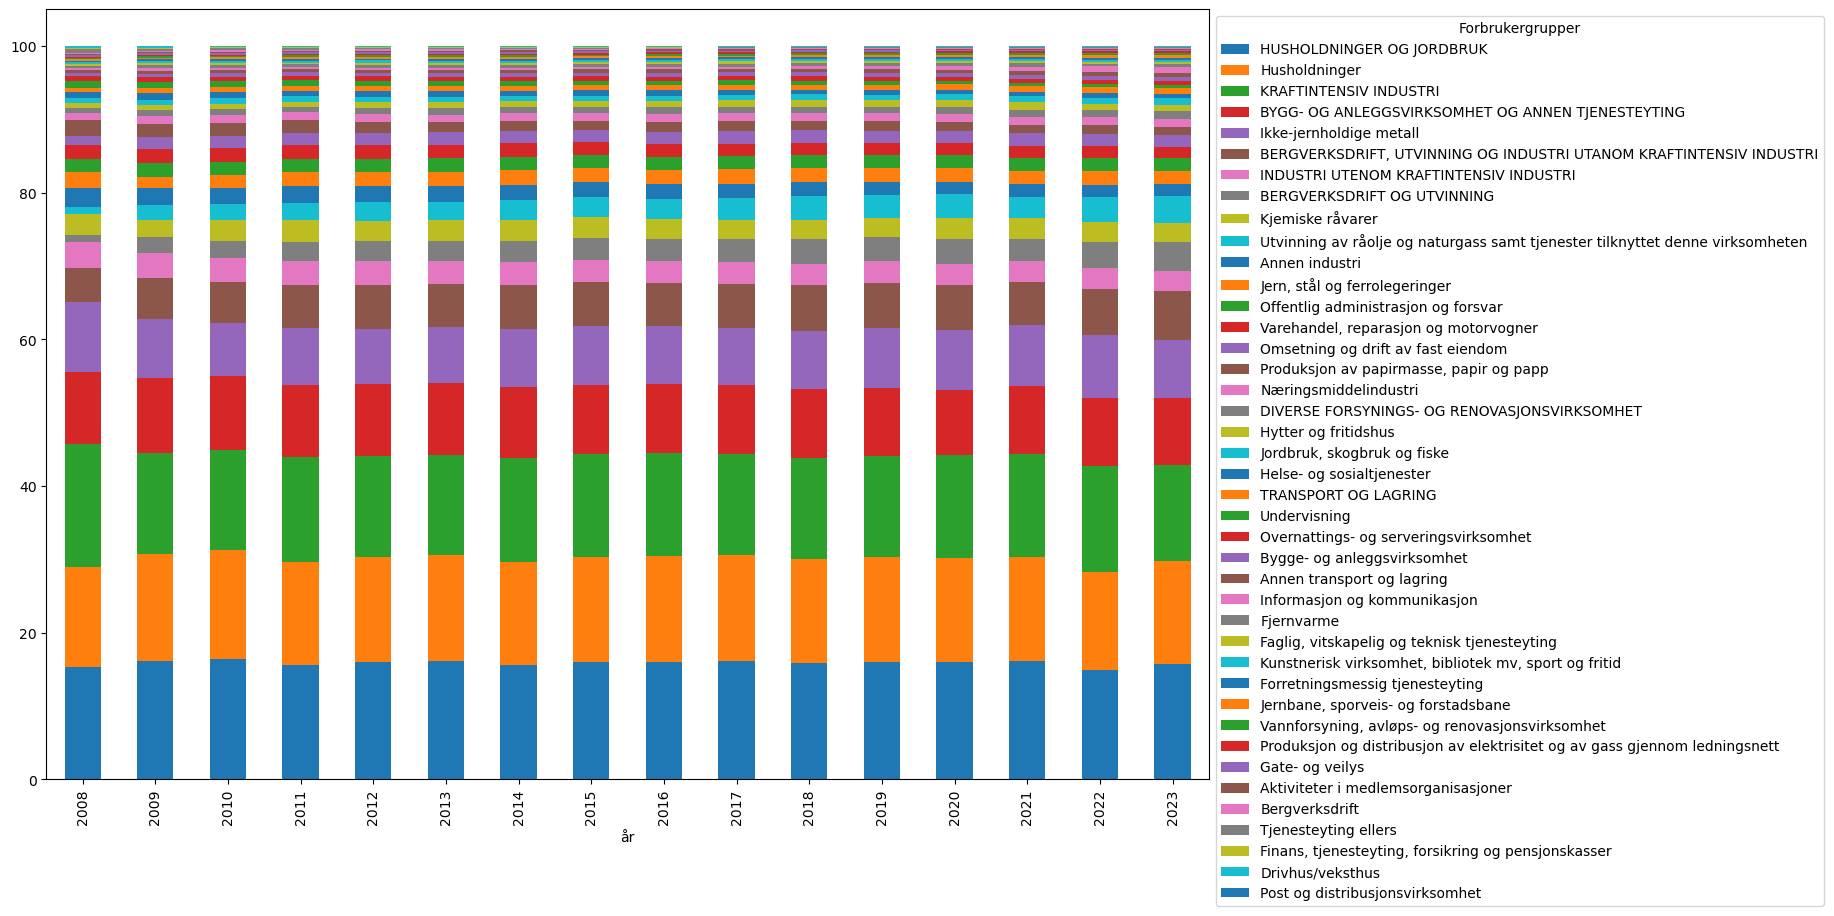

In [63]:
fig, ax = plt.subplots(figsize=(15, 10))

df_percent.plot(kind="bar", stacked=True, ax=ax)
ax.legend(title="Forbrukergrupper", bbox_to_anchor=(1, 1), loc="upper left", fontsize=10)